### Import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Create frame from the video

In [ ]:
#In the terminal : ffmpeg -i input.flv -r 0.1 image%d.jpg
#In jupyter : 
#command = f'ffmpeg -i {file_}.flv -r 0.1 {frame_}%d.jpg'
#os.system(command)

### Import the image

In [5]:
image = cv2.imread('/Users/julianlapique/code/test/image220.jpg')

### Display line on the image

In [6]:
def lines_image(image):
    
    #Process color
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)
    

    #ROI
    height = image.shape[0]
    polygons = np.array([[(400, 410), (900, 410), (600, 250)]])
    mask = np.zeros_like(edges)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(edges, mask)
    
    #display lines
    lines = cv2.HoughLinesP(masked_image, 1, np.pi/180, 35, maxLineGap=250)
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
    return image

In [8]:
#lines_image(image)

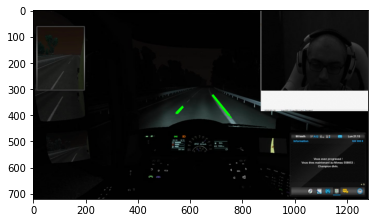

In [9]:
plt.imshow(lines_image(image))
plt.show()

### Import the video 

In [12]:
video = cv2.VideoCapture('/Users/julianlapique/code/test/video_test.flv')

### Read the video with the line

In [15]:
video = cv2.VideoCapture('/Users/julianlapique/code/test/video_test.flv')

while True:
    ret, frame = video.read()
    if not ret:
        video = cv2.VideoCapture('/Users/julianlapique/code/test/video_test.flv')
        continue
        
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5, 5), 0)
    edges = cv2.Canny(blur, 75, 150)

    height = edges.shape[0]
    polygons = np.array([[(400, 410), (900, 410), (600, 250)]])
    mask = np.zeros_like(edges)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(edges, mask)
    
    lines = cv2.HoughLinesP(masked_image, 1, np.pi/180, 35, maxLineGap=250)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
    
    
    
    
    cv2.imshow('frame', frame)
    cv2.imshow('edges', masked_image)
    
    key = cv2.waitKey(25)
    if key == 27:
        break

video.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 